In [188]:
#given B-V = .53 and V = 13.99, B = 14.52

## Converting from Instrumental Magnitudes to Standard Magnitudes

In [189]:
#STAR V
vcounts = 12790.956532

'''
Note: The counts I measured for the V star in the V-band (12970.956532) were slightly less than Professor Moran's (12811).
This differece in counts made a consdierable alteration in the scaling of my graph. After consulting Professor Moran I adopted
his count measurement for the standard star V measurement in the V-band only.
'''

bcounts = 8360.132131

In [190]:
#equation 2.35
import math as m
def diffinv(dv):
    '''
    difference in v band (from standard star)
    signature: list(int)
    returns a list with the differences in the V band for variable star with counts dv;
    denominator in log function is the count of the standard star
    '''
    accv = []
    for values in dv:
        accv.append(-2.5*m.log10(values/12811))
    return accv

In [191]:
diffinv([72910.42117])

[-1.8880164394273191]

In [192]:
#equation 2.36
import math as m
def diffinb(db):
    '''
    difference in b band magnitude (from standard star)
    signature: int
    returns a list with the differences in the B band for variable star with counts dv;
    denominator in log function is the count of the standard star
    '''
    accb = []
    for values in db:
        accb.append(-2.5*m.log10(values/bcounts))
    return accb

In [193]:
diffinb([55042.3693])

[-2.0462099459349066]

In [194]:
#equation 2.41
#def diffci(bv,vv,bx,vx):
'''
    difference in c.olor i.ndices
    signature: list(int), list(int), int ,int
    returns the difference in b and v filters between standard and variable star
'''
def diffci(accb,accv):
    '''
    deltab is the output to eq.2.36
    deltav is the output to eq 2.35
    '''
    bvdiff = []
    i = 0 
    while i < len(accb):
        while i < len(accv):
            bvdiff.append(accb[i] - accv[i])
            i = i + 1
    return bvdiff

In [195]:
diffci([-2.0462099459349066],[-4.3796949691182645])

[2.333485023183358]

In [196]:
#equation 2.49
def deltaBV(bvdiff):
    '''
    signature: list(int)
    returns a list of converted instrumental mags to standard mags;
    diffb is as given from diffci(...)
    '''
    bvdc = []
    #b.band v.band d.ifference c.orrected
    
    for values in bvdiff:
        bvdc.append(values*1.136)
        
    return bvdc

In [197]:
deltaBV([2.333485023183358])

[2.6508389863362942]

In [198]:
#equation 2.48
def V(accv,bvdc):
    '''
    signature:  list(int), list(int)
    returns a list of V standard magnitudes given difference in v mag (as given by diffinv(..) 
    and converted instrumental magnitudes (as given by deltaBV(...))
    '''
    Vs = []
    
    i = 0 
    while i < len(accv):
        while i < len(bvdc):
            Vs.append(accv[i] + (.02 * bvdc[i]))
            i = i + 1
    return Vs

In [199]:
V([-4.3796949691182645],[2.6508389863362942])

[-4.326678189391538]

In [200]:
#equation 2.51
def Vx (Vs):
    '''
    signature: list (int), list(int) ~> list(int)
    returns a list of values corresponding to the V magnitudes of each star given the output
    of equation 2.48 (V(..)) and the output of equation 2.49 (deltaBV(...))
    '''
    Vmags = []
    i = 0 
    while i <len(Vs):
        Vmags.append(13.99 + Vs[i])
        i = i + 1        
    return Vmags  

In [201]:
Vx([-4.326678189391538])

[9.663321810608462]

In [202]:
#equation 2.52
def BV(bvdc):
    '''
    signature: list(int) ~> list(int)
    returns a list of the color indices in standard mags given the output of deltaBV(...)
    '''
    BVs = []
    i = 0
    while i < len(bvdc):
        BVs.append(bvdc[i]+.53)
        i = i + 1
    return BVs

In [203]:
BV([2.6508389863362942])

[3.180838986336294]

## Standard Magnitude Correction for Reddening

In [204]:
#correction for reddening
# so (B-V)observed = (B-V)intrinsic + Ab - Av
#where Ab is the extinction in the b band and Av is the extinction in the v band
def crbv(BVs):
    '''
    c.orrection for r.eddening in b - v
    signature: list(int)~> list(int) 
    returns a list of the correct 
    '''
    Av = 3 * .31
    Ab = Av + .31
    xaxis = []
    for  values in BVs:
        xaxis.append(values + .31)
        
    newxaxis = []    
    for values in xaxis:
        newxaxis.append(0-values)
        
    return newxaxis

In [205]:
crbv([3.180838986336294])

[-3.490838986336294]

In [206]:
def crv(Vmags):
    '''
    signature: list(int) ~> list(int)
    returns the Vmag of the stars corrected for reddening given the output of eq 2.51 (Vx(..))
    '''
    Av = 3 * .31
    yaxis = []
    for values in Vmags:
        yaxis.append(values-Av)
        
    return yaxis

In [207]:
crv([9.663321810608462])

[8.733321810608462]

## Importing Isochrone Data

In [333]:
#isochrone data for 224 Myr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data1 = pd.read_csv('iso224.csv')
print(data1)

         Z   age (yr)  mass     M_B     M_V    B-V
0    0.008  224000000  0.15  14.090  12.562  1.528
1    0.008  224000000  0.20  13.012  11.547  1.465
2    0.008  224000000  0.25  12.320  10.891  1.429
3    0.008  224000000  0.30  11.826  10.439  1.387
4    0.008  224000000  0.35  11.417  10.065  1.352
..     ...        ...   ...     ...     ...    ...
173  0.008  224000000  1.48  -1.793  -3.398  1.605
174  0.008  224000000  1.38  -1.779  -3.384  1.605
175  0.008  224000000  1.27  -1.765  -3.370  1.605
176  0.008  224000000  1.17  -1.749  -3.354  1.605
177  0.008  224000000  1.04  -1.731  -3.336  1.605

[178 rows x 6 columns]


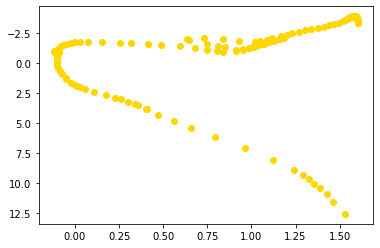

In [334]:
x1 = data1['B-V']
y1 = data1['M_V']
plt.scatter(x1, y1, label='sin(x)', c='gold')
plt.gca().invert_yaxis()

In [335]:
#isochrone data for 447 Myr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data2 = pd.read_csv('iso447.csv')
print(data2)

         Z     age (yr)  mass     M_B     M_V    B-V
0      NaN          NaN   NaN     NaN     NaN    NaN
1    0.008  447000000.0  0.15  14.089  12.561  1.528
2    0.008  447000000.0  0.20  13.011  11.546  1.465
3    0.008  447000000.0  0.25  12.318  10.889  1.429
4    0.008  447000000.0  0.30  11.824  10.437  1.387
..     ...          ...   ...     ...     ...    ...
195  0.008  447000000.0  1.36  -1.272  -2.879  1.607
196  0.008  447000000.0  1.25  -1.251  -2.859  1.608
197  0.008  447000000.0  1.14  -1.229  -2.837  1.608
198  0.008  447000000.0  1.03  -1.205  -2.813  1.608
199  0.008  447000000.0  0.85  -1.178  -2.786  1.608

[200 rows x 6 columns]


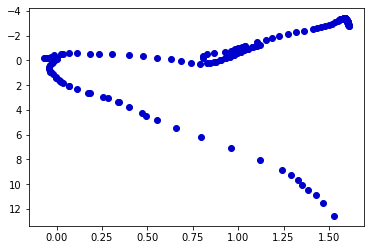

In [336]:
x2 = data2['B-V']
y2 = data2['M_V']
plt.scatter(x2, y2, label='sin(x)', c='mediumblue')
plt.gca().invert_yaxis()

In [337]:
#isochrone data for 708 Myr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data3 = pd.read_csv('iso708.csv')
print(data3)

         Z     age (yr)  mass     M_B     M_V    B-V
0      NaN          NaN   NaN     NaN     NaN    NaN
1    0.008  708000000.0  0.15  14.088  12.560  1.528
2    0.008  708000000.0  0.20  13.009  11.544  1.465
3    0.008  708000000.0  0.25  12.315  10.887  1.428
4    0.008  708000000.0  0.30  11.822  10.435  1.387
..     ...          ...   ...     ...     ...    ...
200  0.008  708000000.0  1.14  -0.864  -2.474  1.610
201  0.008  708000000.0  1.06  -0.851  -2.461  1.610
202  0.008  708000000.0  0.98  -0.837  -2.447  1.610
203  0.008  708000000.0  0.89  -0.821  -2.431  1.610
204  0.008  708000000.0  0.77  -0.804  -2.415  1.611

[205 rows x 6 columns]


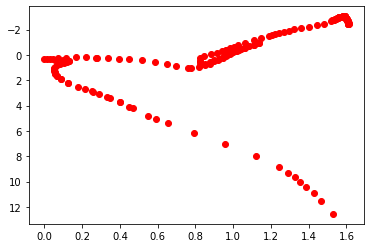

In [338]:
x3 = data3['B-V']
y3 = data3['M_V']
plt.scatter(x3, y3, label='sin(x)', c='red')
plt.gca().invert_yaxis()

## Importing Varaible Star Data (140 stars)

In [242]:
#data for 140 variable stars
#even numbers as indicated by the leftmost column demarcate data for variable stars in the B-band
#odd numbers as indicated by the leftmost column demarcate data for variable stars in the V-Band
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('ASTFinalProject280.csv')
print(data)

                  Label  Saturated  Source_Radius  Sky_Rad(min)  Sky_Rad(max)  \
0      1  m37b-sky.fits          0              5            15            15   
1      2  m37v-sky.fits          0              5            15            15   
2      3  m37b-sky.fits          0              5            15            15   
3      4  m37v-sky.fits          0              5            15            15   
4      5  m37b-sky.fits          0              5            15            15   
..   ...            ...        ...            ...           ...           ...   
275  276  m37v-sky.fits          0              5            15            15   
276  277  m37b-sky.fits          0              5            15            15   
277  278  m37v-sky.fits          0              5            15            15   
278  279  m37b-sky.fits          0              5            15            15   
279  280  m37v-sky.fits          0              5            15            15   

         X(FITS)      Y(FIT

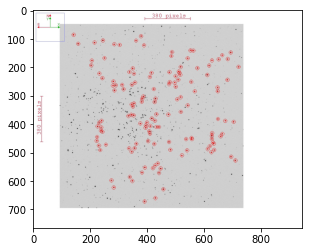

In [271]:
#an image of the measurements I took (B-band)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img2 = mpimg.imread('m37b-sky.jpg')
imgplot = plt.imshow(img2)
plt.show()

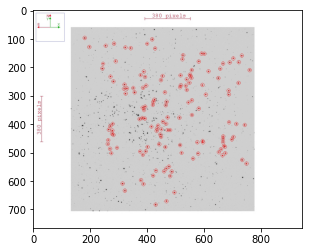

In [270]:
#an image of the measurements I took (V-band)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1 = mpimg.imread('m37v-sky.jpg')
imgplot = plt.imshow(img1)
plt.show()

In [232]:
#extracting count data for V and B band
f = data['Source-Sky']
print(f)

0       55042.36923
1       72910.42117
2       57350.97030
3       69738.68826
4      250921.51520
           ...     
275     36816.92081
276     21452.97737
277     30525.23706
278     71659.16013
279     89243.49559
Name: Source-Sky, Length: 280, dtype: float64


In [233]:
#create two lists one containing data from B-band filtered image and the other containing data from V-band filtered image
def split(data):
    '''
    signature: list(int) ~> list(int), list(int)
    returns two lists each composed of the measurements taken in the b and v band filtered image
    '''
    bband = []
    vband = []
    i= 0
    while i <len(data):
        if i%2 == 0:
            vband.append(data[i])
            i = i + 1
        else:
            bband.append(data[i])
            i = i + 1
    return bband, vband    

In [234]:
bband, vband = split(f)

In [235]:
#confirm that the length of the B and V lists of data are the same
len(bband)

140

In [236]:
len(vband)

140

## Overplotting Isochrones and Variable Star Data (Raw)

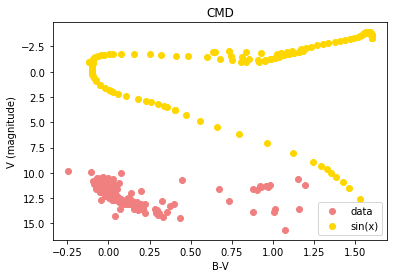

In [339]:
#compare data with isochone 224 Myr
import matplotlib.pyplot as plt
def main1(dv,db):
    '''
    signature: list(int), list (int) ~> Nonetype
    input the counts for variable stars for vband and bband (in that order)
    returns a CMB graph in standard magnitudes in comparison to 224Myr isochrone
    '''
    accv = diffinv(dv)
    accb = diffinb(db)
    bvdiff = diffci(accb,accv)
    bvdc = deltaBV(bvdiff)
    Vs = V(accv,bvdc)
    Vmags = Vx(Vs)
    BVs = BV(bvdc)
    xaxis = crbv(BVs)
    yaxis = crv(Vmags)
    
    plt.scatter(xaxis, yaxis, label ='data', c='lightcoral') 
    
    plt.title('CMD')
    plt.xlabel('B-V')
    plt.ylabel('V (magnitude)')
    
    #224
    x1 = data1['B-V']
    y1 = data1['M_V']
    plt.scatter(x1, y1, label='sin(x)', c='gold')
    
    plt.legend()
    plt.gca().invert_yaxis()
 
main1(vband,bband)

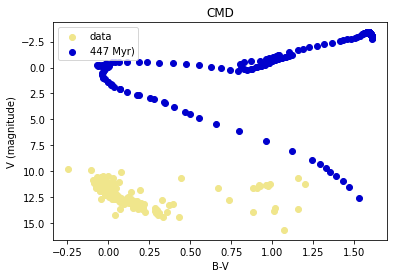

In [341]:
#compare data with isochrone 447 Myr
import matplotlib.pyplot as plt

def main2(dv,db):
    '''
    signature: list(int), list (int) ~> Nonetype
    input the counts for variable stars for vband and bband (in that order)
    returns a CMB graph in standard magnitudes in comparison to 447Myr isochrone
    '''
    accv = diffinv(dv)
    accb = diffinb(db)
    bvdiff = diffci(accb,accv)
    bvdc = deltaBV(bvdiff)
    Vs = V(accv,bvdc)
    Vmags = Vx(Vs)
    BVs = BV(bvdc)
    xaxis = crbv(BVs)
    yaxis = crv(Vmags)
    
    plt.scatter(xaxis, yaxis, label = 'data', c='khaki') 
    
    plt.title('CMD')
    plt.xlabel('B-V')
    plt.ylabel('V (magnitude)')
    
    #447
    x2 = data2['B-V']
    y2 = data2['M_V']
    plt.scatter(x2, y2, label='447 Myr)', c='mediumblue')
    
    plt.legend()
    plt.gca().invert_yaxis()
main2(vband, bband)

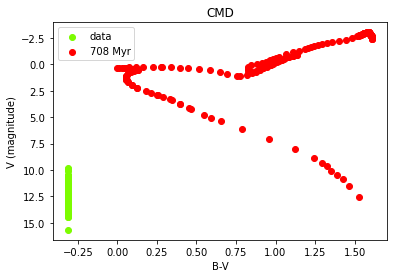

In [343]:
#compare data with isochorone 708Myr
def main3(dv,db):
    '''
    signature: list(int), list (int) ~> Nonetype
    input the counts for variable stars for vband and bband (in that order)
    returns a CMB graph in standard magnitudes in comparison to 708Myr isochrone
    '''
    accv = diffinv(dv)
    accb = diffinb(db)
    bvdiff = diffci(accb,accv)
    bvdc = deltaBV(bvdiff)
    Vs = V(accv,bvdc)
    Vmags = Vx(Vs)
    BVs = BV(bvdc)
    xaxis = crbv(BVs)
    yaxis = crv(Vmags)
    
    plt.scatter(xaxis, yaxis, c='lawngreen', label = 'data') 
    
    plt.title('CMD')
    plt.xlabel('B-V')
    plt.ylabel('V (magnitude)')
    
    #708
    x3 = data3['B-V']
    y3 = data3['M_V']
    plt.scatter(x3, y3, label='708 Myr', c='red')
    
    plt.legend()
    plt.gca().invert_yaxis()

    
main3(vband,vband)

## Isoschrone Adjustment

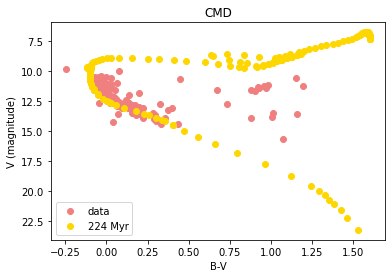

In [370]:
#shift isochrone 224 Myr
def main11(dv,db):
    '''
    signature: list(int), list (int) ~> Nonetype
    input the counts for variable stars for vband and bband (in that order)
    returns a CMB graph in standard magnitudes in comparison to 224Myr isochrone
    '''
    accv = diffinv(dv)
    accb = diffinb(db)
    bvdiff = diffci(accb,accv)
    bvdc = deltaBV(bvdiff)
    Vs = V(accv,bvdc)
    Vmags = Vx(Vs)
    BVs = BV(bvdc)
    xaxis = crbv(BVs)
    yaxis = crv(Vmags)
    
    plt.scatter(xaxis, yaxis, label ='data', c='lightcoral') 
    
    plt.title('CMD')
    plt.xlabel('B-V')
    plt.ylabel('V (magnitude)')
    
    #224
    x1 = data1['B-V']
    y1 = data1['M_V']
    
    y11 = []
    for values in y1:
        y11.append(10.7+ values)
        
        
    plt.scatter(x1, y11, label='224 Myr', c='gold')
    
    plt.legend()
    plt.gca().invert_yaxis()
 
main11(vband,bband)

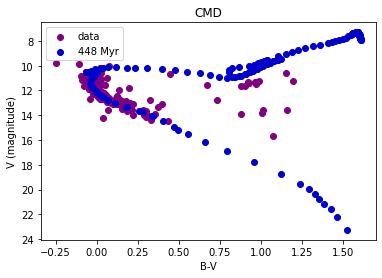

In [369]:
#shift isochrone 448 Myr
def main22(dv,db):
    '''
    signature: list(int), list (int) ~> Nonetype
    input the counts for variable stars for vband and bband (in that order)
    returns a CMB graph in standard magnitudes in comparison to 447Myr isochrone
    '''
    accv = diffinv(dv)
    accb = diffinb(db)
    bvdiff = diffci(accb,accv)
    bvdc = deltaBV(bvdiff)
    Vs = V(accv,bvdc)
    Vmags = Vx(Vs)
    BVs = BV(bvdc)
    xaxis = crbv(BVs)
    yaxis = crv(Vmags)
    
    plt.scatter(xaxis, yaxis, label = 'data', c='purple') 
    
    plt.title('CMD')
    plt.xlabel('B-V')
    plt.ylabel('V (magnitude)')
    
    #447
    x2 = data2['B-V']
    y2 = data2['M_V']
    
    y22 = []
    for values in y2:
        y22.append(values + 10.7)
        
    plt.scatter(x2, y22, label='448 Myr', c='mediumblue')
    
    plt.legend()
    plt.gca().invert_yaxis()
main22(vband, bband)

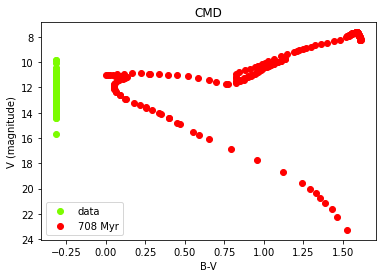

In [371]:
#shift isochrone 708 Myr
def main33(dv,db):
    '''
    signature: list(int), list (int) ~> Nonetype
    input the counts for variable stars for vband and bband (in that order)
    returns a CMB graph in standard magnitudes in comparison to 708Myr isochrone
    '''
    accv = diffinv(dv)
    accb = diffinb(db)
    bvdiff = diffci(accb,accv)
    bvdc = deltaBV(bvdiff)
    Vs = V(accv,bvdc)
    Vmags = Vx(Vs)
    BVs = BV(bvdc)
    xaxis = crbv(BVs)
    yaxis = crv(Vmags)
    
    plt.scatter(xaxis, yaxis, c='lawngreen', label = 'data') 
    
    plt.title('CMD')
    plt.xlabel('B-V')
    plt.ylabel('V (magnitude)')
    
    #708
    x3 = data3['B-V']
    y3 = data3['M_V']
    
    
    y33 = []
    for values in y3:
        y33.append(10.7 + values)
        
        
    plt.scatter(x3, y33, label='708 Myr', c='red')
    
    plt.legend()
    plt.gca().invert_yaxis()
    
main33(vband,vband)

## Distance Modulus

In [306]:
'''
distance modulus (say it = 10.859)
distance Modulus m - M = 5log(d / 10)
m = apparent magnitude 
m - Absolute magnitude
d and 10 are in parsecs
'''
def solveford(shift):
    '''
    signature: int ~> int
    input the amount the isochrone is shifted (this is equal to m - M);
    returns the distance to the cluster in units of parsecs
    '''
    return 10**(shift / 5) * 10

In [372]:
solveford(10.7)

1380.3842646028838

## Summary

Using Astro Image JD, I measured the number of counts of 140 different stars from images filtered through the B and V bands. This process was done so that the count of a star was measureed first in the B - band image and then in the V - band image. This process was continued until a total of 280 data points were obtained (or 140 data points in the B - band and 140 data points in the V - band). 

Note: While aquring these data points there was no room for error; data points must CONSISTENTLY be obtained in an alternating fashion (from B - band image to V - band image). 
Note: Stars were selected based on their image clarity -- that is I avoided taking the measurements of stars that were blended/overlapping with others.

As set up, I set my aperture radius to 5 pixels (this reduced the possibility of contamination from nearby stars, which is highly prevalent due to high star density in some regions of the images). I also set the inner and outer radii of the background annulus to 15 pixels as a means of voiding AIJ default background subtraction feature. Lastly, I set the centroid aperture on, this ensured that each time I took a measurement the centroid would be centered on the star in consideration thereby optimizing source counts for each star. (tweak black and white to your preference to increase star visibility in both images)

During the process of obtaining measurements I made sure to get a diverse set of stars spanning various regions of images. When possible I also tried to take measurements of stars that were in near proximity (yet not overlapping) with others. 

Using the equations provided from the text "Astronomical Photometry" by A.A. Henden & R.H. Kaitchuck I converted the counts (Source-Sky coloumn of data) of each star to standard magnitude (one for the standard magnitude in the B filter and the other in the V). 

Note: As a prelimnary step to the conversion process I measured the counts of a given standard star, Star V, with its standard B and V magnitudes given: V = 13.99; B - V = 0.53.

The end result of this process was 140 B-V (the differences in color indices) data points and their complementary 140 V (standard magnitude in the V - band) data points. 

I then proceeded to adjust the B-V and the V magnitudes of the variable stars for reddening (or dimming due to stellar dust in interstellar space). For this I set the color transform coefficient to ε = .02 and μ = 1.136 (these values correspond to the imaging system in use, Kitt Peak System: WIYN .9m telescope with 2048x2048 CCD). In more detail, the CCD imaging is linear to saturation limit (ie our measurements are an accurate representation of object brightness). There is also 2-2.3 per FWHM (optimal resolution). 

Following reddening correction the data points were plotted and compared to the isochrone modeling done by Girardi. The data was compared to three isochrones: 224 Myr, 447 Myr, and 708Myr. When the isochonres were overplotted with the data (with an isochrone vertical shift of 10.7) we see that isochrone 2 (447 Myr) most accurately represents the data (where here the best fit is determined by the apparent similarity of the data with the "horseshoe" turn on the main sequence; if the data follows this horsehoe it tells us that the isochrone does indeed model the characterisitcs of the stars measured thus the more the data follows the horshoe the more agreeement there is between data and the isochrone). 

Finally because our data corresponds to the apparent magnitude of the measured stars, and the isochrones of best fit is given in absolute magnitudes we can take the vertical shift of the isochrone (10.7) and set this equal to our distance modulus (m-M). In this way we can solve for the distance to the cluster of measured stars.

Age of Cluster Measured: 448Myr

Distance to Cluster: 1380.3842646028838 pc